IMPORTAMOS LIBRERIAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers

IMPORTAMOS DATASET

In [ ]:
data=pd.read_csv('/content/Sunspots.csv')

In [ ]:
data.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


DATOS EN LIMPIO

In [ ]:
df=data[['Date','Monthly Mean Total Sunspot Number']]
df=df.set_index('Date')
df

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2020-09-30,0.6
2020-10-31,14.4
2020-11-30,34.0


DIMENSION

In [ ]:
df.shape

(3265, 1)

GRAFICAMOS

Text(0, 0.5, 'Monthly Mean Total Sunspot Number')

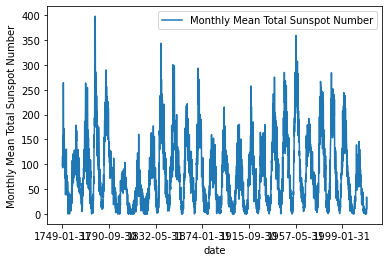

In [ ]:
df.plot()
plt.xlabel('date')
plt.ylabel('Monthly Mean Total Sunspot Number')

MAXIMOS Y MINIMOS ANALIZADOS

In [ ]:
print('Min', np.min(df))
print('Max', np.max(df))

Min Monthly Mean Total Sunspot Number    0.0
dtype: float64
Max Monthly Mean Total Sunspot Number    398.2
dtype: float64


VERIFICAMOS SI EXISTE UN VALOR FALTANTE

In [ ]:
df.isnull().sum()

Monthly Mean Total Sunspot Number    0
dtype: int64

ESCALAMOS

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset = df.astype('float32')

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset)

In [ ]:
print(dataset_scaled[:10])

[[0.24284278]
 [0.26192868]
 [0.2930688 ]
 [0.23304872]
 [0.35585132]
 [0.34957308]
 [0.39678553]
 [0.27749875]
 [0.31767955]
 [0.31592166]]


GENRAMOS LOS DATOS EN SERIES DE TIEMPORALES

In [ ]:
X_data = dataset_scaled[:-1]
Y_data = dataset_scaled[1:]

In [ ]:
from sklearn.model_selection import train_test_split

SEPARAMOS LOS DATOS DE ENTRENAMIENTO Y PRUEBA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.2, shuffle=False)

In [ ]:
X_train.shape

(2611, 1)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
print('La dimensión del conjunto de entrenamiento (entrada) es:', X_train.shape)
print('La dimensión del conjunto de entrenamiento (salida)  es:', y_train.shape)
print('La dimensión del conjunto de prueba (entrada) es:       ', X_test.shape)
print('La dimensión del conjunto de prueba (salida) es:        ', y_test.shape)

La dimensión del conjunto de entrenamiento (entrada) es: (2611, 1, 1)
La dimensión del conjunto de entrenamiento (salida)  es: (2611, 1)
La dimensión del conjunto de prueba (entrada) es:        (653, 1, 1)
La dimensión del conjunto de prueba (salida) es:         (653, 1)


GENERAMOS EL MODELO

In [ ]:
model = Sequential()

model.add(LSTM(4, batch_input_shape=(1, 1, 1), stateful=True))

model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 4)                    96        
                                                                 
 dense (Dense)               (1, 1)                    5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


COMPILACION Y ENTRENAMIENTO

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

Epoch 1/100
2349/2349 - 12s - loss: 0.0062 - val_loss: 0.0180 - 12s/epoch - 5ms/step
Epoch 2/100
2349/2349 - 5s - loss: 0.0050 - val_loss: 0.0132 - 5s/epoch - 2ms/step
Epoch 3/100
2349/2349 - 5s - loss: 0.0047 - val_loss: 0.0114 - 5s/epoch - 2ms/step
Epoch 4/100
2349/2349 - 5s - loss: 0.0046 - val_loss: 0.0105 - 5s/epoch - 2ms/step
Epoch 5/100
2349/2349 - 6s - loss: 0.0045 - val_loss: 0.0100 - 6s/epoch - 2ms/step
Epoch 6/100
2349/2349 - 6s - loss: 0.0045 - val_loss: 0.0098 - 6s/epoch - 2ms/step
Epoch 7/100
2349/2349 - 7s - loss: 0.0045 - val_loss: 0.0096 - 7s/epoch - 3ms/step
Epoch 8/100
2349/2349 - 5s - loss: 0.0045 - val_loss: 0.0094 - 5s/epoch - 2ms/step
Epoch 9/100
2349/2349 - 5s - loss: 0.0045 - val_loss: 0.0093 - 5s/epoch - 2ms/step
Epoch 10/100
2349/2349 - 5s - loss: 0.0044 - val_loss: 0.0092 - 5s/epoch - 2ms/step
Epoch 11/100
2349/2349 - 5s - loss: 0.0044 - val_loss: 0.0091 - 5s/epoch - 2ms/step
Epoch 12/100
2349/2349 - 5s - loss: 0.0044 - val_loss: 0.0090 - 5s/epoch - 2ms/step

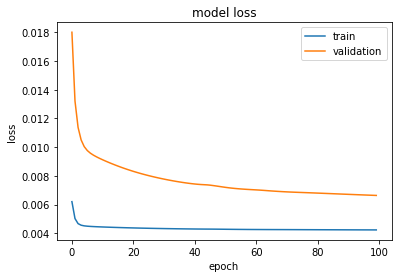

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2, shuffle=False, validation_split=0.1)
model.summary()
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

EVALUAMOS EL MODELO

In [ ]:
model.reset_states()
trainPredict = model.predict(X_train, batch_size=1)
trainPredict = scaler.inverse_transform(trainPredict)
y_pred_train = scaler.inverse_transform(y_train)

In [ ]:
model.reset_states()
testPredict = model.predict(X_test, batch_size=1)
testPredict = scaler.inverse_transform(testPredict)
y_pred_test = scaler.inverse_transform(y_test)

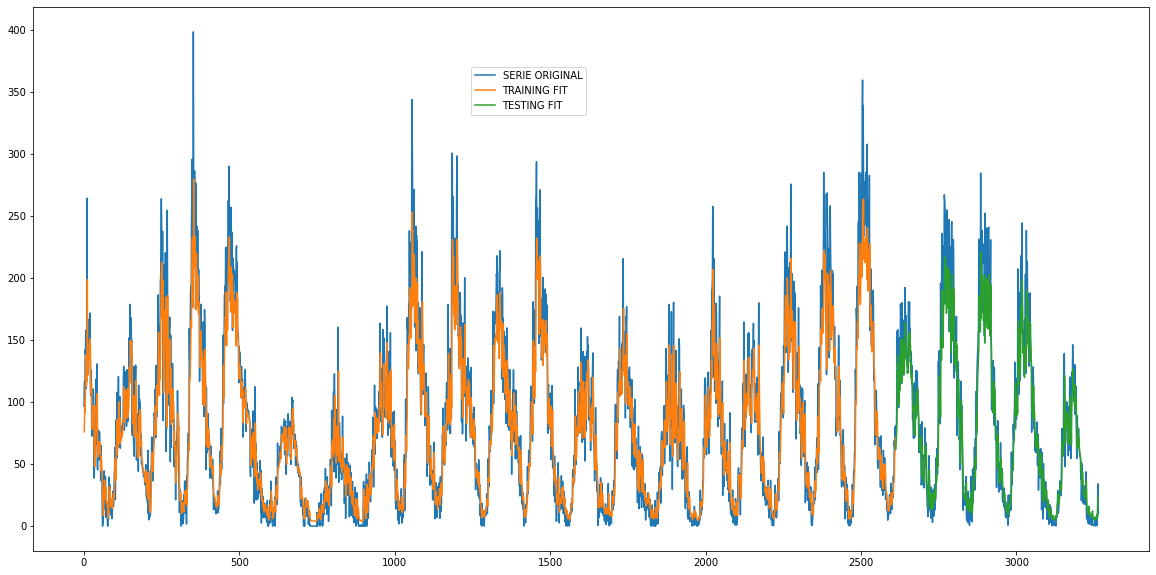

In [ ]:
trainPredictPlot = np.empty_like(dataset_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[1:len(trainPredict)+1, :] = trainPredict
testPredictPlot = np.empty_like(dataset_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+1:len(dataset_scaled)+1, :] = testPredict
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(dataset_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['SERIE ORIGINAL','TRAINING FIT','TESTING FIT'], bbox_to_anchor=(0.5, 0.9))
plt.show()